# Basic Queueing System

In [1]:
%matplotlib inline
import ciw
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

In [2]:
params = {
    'Arrival_distributions': {'Class 0': [['Exponential', 5.0], ['Exponential', 3.4]],
                              'Class 1': [['Exponential', 4.1], ['Exponential', 1.2]]},
    'Service_distributions': {'Class 0': [['Exponential', 7.0], ['Exponential', 6.2]],
                              'Class 1': [['Exponential', 2.1], ['Exponential', 4.5]]},
    'Transition_matrices': {'Class 0': [[0.0, 0.5],
                                        [0.5, 0.0]],
                            'Class 1': [[0.2, 0.2],
                                        [0.2, 0.2]]},
    'Number_of_servers': [5, 2]
}

In [3]:
ciw.seed(1)
N = ciw.create_network(params)
Q = ciw.Simulation(N)
Q.simulate_until_max_time(100)

In [4]:
recs = Q.get_all_records()

0.635494910344


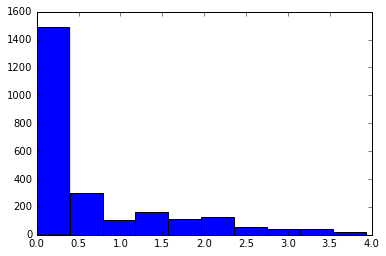

In [5]:
waits = [r.waiting_time for r in recs]
print(np.mean(waits))
plt.hist(waits);

1.21078909814


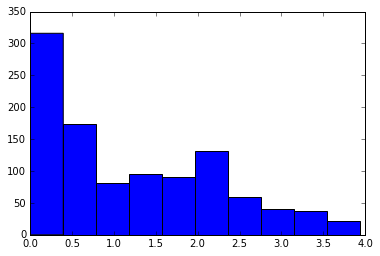

In [6]:
waits = [r.waiting_time for r in recs if r.node==2]
print(np.mean(waits))
plt.hist(waits);

#  
#  
#  
#  
#  
#  
# Service Distributions

In [7]:
params = {
    'Arrival_distributions': [['Exponential', 15.0]],
    'Service_distributions': [['Exponential', 10.0]],
    'Transition_matrices': [[0.0]],
    'Number_of_servers': [1]
}

In [8]:
ciw.seed(1)
N = ciw.create_network(params)
Q = ciw.Simulation(N)
Q.simulate_until_max_time(200)
recs = Q.get_all_records()
service_times = [r.service_time for r in recs]

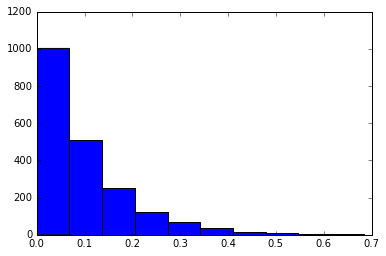

In [9]:
plt.hist(service_times);

In [10]:
params = {
    'Arrival_distributions': [['Exponential', 15.0]],
    'Service_distributions': [['Lognormal', -2.65, 0.83]],
    'Transition_matrices': [[0.0]],
    'Number_of_servers': [1]
}

In [11]:
ciw.seed(2)
N = ciw.create_network(params)
Q = ciw.Simulation(N)
Q.simulate_until_max_time(200)
recs = Q.get_all_records()
service_times = [r.service_time for r in recs]

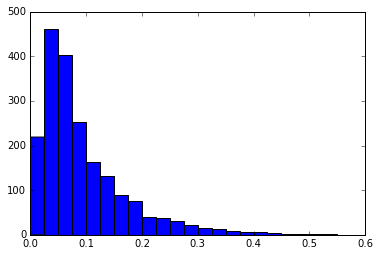

In [12]:
plt.hist(service_times, bins=[i/40 for i in range(24)]);

In [13]:
params = {
    'Arrival_distributions': [['Exponential', 15.0]],
    'Service_distributions': [['Uniform', 0.0, 0.2]],
    'Transition_matrices': [[0.0]],
    'Number_of_servers': [1]
}

In [14]:
ciw.seed(2)
N = ciw.create_network(params)
Q = ciw.Simulation(N)
Q.simulate_until_max_time(200)
recs = Q.get_all_records()
service_times = [r.service_time for r in recs]

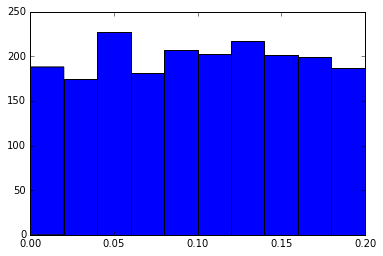

In [15]:
plt.hist(service_times);

In [16]:
params = {
    'Arrival_distributions': [['Exponential', 15.0]],
    'Service_distributions': [['Custom', [[0.4, 0.04], [0.3, 0.09], [0.2, 0.12], [0.1, 0.45]]]],
    'Transition_matrices': [[0.0]],
    'Number_of_servers': [1]
}

In [17]:
ciw.seed(2)
N = ciw.create_network(params)
Q = ciw.Simulation(N)
Q.simulate_until_max_time(200)
recs = Q.get_all_records()
service_times = [r.service_time for r in recs]

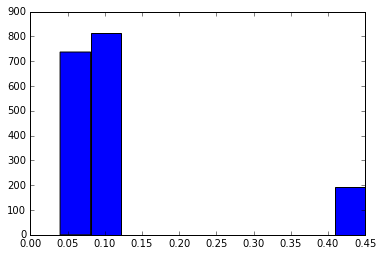

In [18]:
plt.hist(service_times);

In [19]:
Counter(service_times)

Counter({0.040000000000000001: 737,
         0.089999999999999997: 507,
         0.12: 307,
         0.45000000000000001: 194})

#  
#  
#  
#  
#  
#  
# Priority Queues

In [20]:
params = {
    'Arrival_distributions': {'Class 0': [['Exponential', 5.0]],
                              'Class 1': [['Exponential', 4.1]]},
    'Service_distributions': {'Class 0': [['Exponential', 7.0]],
                              'Class 1': [['Exponential', 2.1]]},
    'Transition_matrices': {'Class 0': [[0.0]],
                            'Class 1': [[0.0]]},
    'Number_of_servers': [3]
}

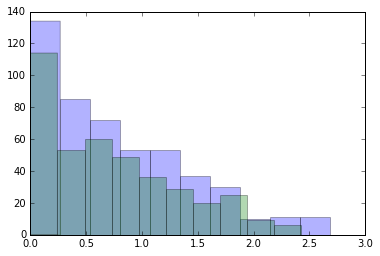

In [21]:
ciw.seed(42)
N = ciw.create_network(params)
Q = ciw.Simulation(N)
Q.simulate_until_max_time(100)
recs = Q.get_all_records()
waits0 = [r.waiting_time for r in recs if r.customer_class==0]
waits1 = [r.waiting_time for r in recs if r.customer_class==1]
plt.hist(waits0, alpha=0.3)
plt.hist(waits1, alpha=0.3)
plt.show()

In [22]:
params = {
    'Arrival_distributions': {'Class 0': [['Exponential', 5.0]],
                              'Class 1': [['Exponential', 4.1]]},
    'Service_distributions': {'Class 0': [['Exponential', 7.0]],
                              'Class 1': [['Exponential', 2.1]]},
    'Transition_matrices': {'Class 0': [[0.0]],
                            'Class 1': [[0.0]]},
    'Number_of_servers': [3],
    'Priority_classes': {'Class 0': 0,
                         'Class 1': 1}
}

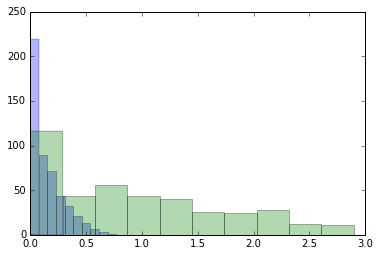

In [23]:
ciw.seed(42)
N = ciw.create_network(params)
Q = ciw.Simulation(N)
Q.simulate_until_max_time(100)
recs = Q.get_all_records()
waits0 = [r.waiting_time for r in recs if r.customer_class==0]
waits1 = [r.waiting_time for r in recs if r.customer_class==1]
plt.hist(waits0, alpha=0.3)
plt.hist(waits1, alpha=0.3)
plt.show()

#  
#  
#  
#  
#  
#  
# Baulking

In [24]:
def pycon_baulking_function(x):
    if x <= 2:
        return x / 20.0
    if x <= 10:
        return x / (x + 3)
    return 1.0

In [25]:
params = {
    'Arrival_distributions': [['Exponential', 10.0]],
    'Service_distributions': [['Exponential', 12.0]],
    'Number_of_servers': [1],
    'Transition_matrices': [[0.0]]
}



params_baulk = {
    'Arrival_distributions': [['Exponential', 10.0]],
    'Service_distributions': [['Exponential', 12.0]],
    'Number_of_servers': [1],
    'Transition_matrices': [[0.0]],
    'Baulking_functions': [pycon_baulking_function]
}

In [26]:
average_waits = []
for i in range(25):
    ciw.seed(i)
    N = ciw.create_network(params)
    Q = ciw.Simulation(N)
    Q.simulate_until_max_time(100)
    recs = Q.get_all_records()
    waits = [r.waiting_time for r in recs]
    average_waits.append(sum(waits)/len(waits))
print(sum(average_waits)/len(average_waits))

0.4338055231813675


In [27]:
average_waits = []
for i in range(25):
    ciw.seed(i)
    N = ciw.create_network(params_baulk)
    Q = ciw.Simulation(N)
    Q.simulate_until_max_time(100)
    recs = Q.get_all_records()
    waits = [r.waiting_time for r in recs]
    average_waits.append(sum(waits)/len(waits))
print(sum(average_waits)/len(average_waits))

0.10021909113183498


#  
#  
#  
#  
#  
#  
# Server Schedules

In [28]:
params = {
    'Arrival_distributions': [['Exponential', 2.0]],
    'Service_distributions': [['Exponential', 10.0]],
    'Transition_matrices': [[0.0]],
    'pyconuk_schedule': [[10, 1], [20, 0]],
    'Number_of_servers': ['pyconuk_schedule']
}

In [29]:
ciw.seed(1)
N = ciw.create_network(params)
Q = ciw.Simulation(N)
Q.simulate_until_max_time(200)
recs = Q.get_all_records()
waits = [r.waiting_time for r in recs]

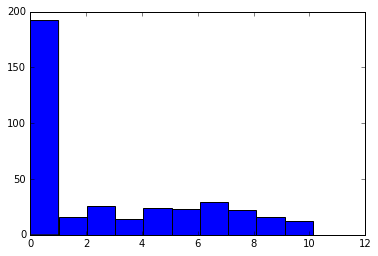

In [30]:
plt.hist(waits);

#  
#  
#  
#  
#  
#  
# Deadlock Detection

In [31]:
params = {
    'Arrival_distributions': [['Exponential', 4.0]],
    'Service_distributions': [['Exponential', 5.0]],
    'Transition_matrices': [[0.5]],
    'Queue_capacities': [4],
    'Number_of_servers': [1]
}

In [32]:
ciw.seed(1)
N = ciw.create_network(params)

Q = ciw.Simulation(N, deadlock_detector='StateDigraph')

Q.simulate_until_deadlock()

In [33]:
Q.times_to_deadlock[((0, 0),)]

1.3014081247580078